In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
dataset = yf.download('INDF', '2021-01-01', '2023-12-02', auto_adjust=True)
dataset.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,30.000166,30.000166,29.712088,29.712088,500
2021-01-05,30.465670,30.465670,30.465670,30.465670,100
2021-01-06,30.868215,30.890154,30.816704,30.890154,600
2021-01-07,30.887294,30.992223,30.787134,30.894924,900
2021-01-08,31.149616,31.238331,31.106692,31.238331,3000


In [6]:
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
quick_analysis(dataset)

Data Types:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
Rows and Columns:
(734, 5)
Column Names:
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


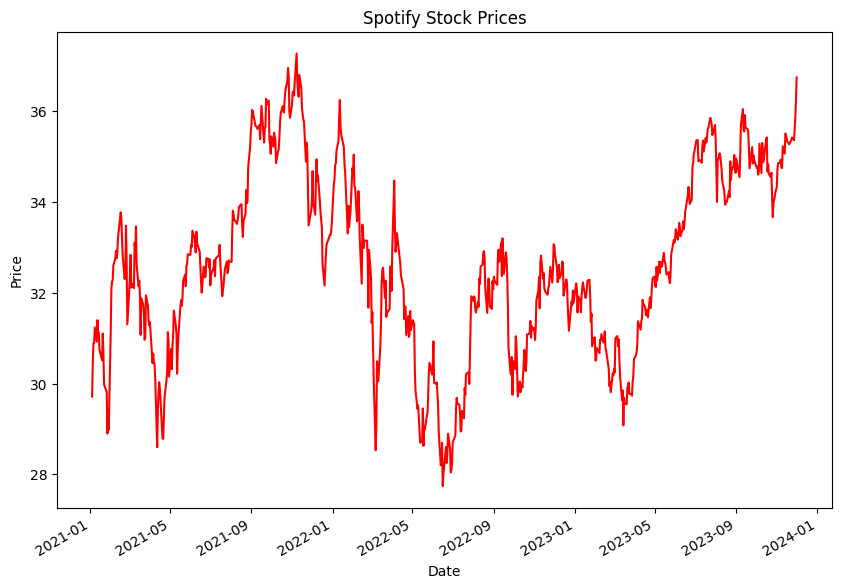

In [7]:
# Membuat DataFrame dari data harga saham
df = pd.DataFrame(dataset['Close'])
# Menghapus baris dengan nilai NaN
df.dropna(inplace=True)
dataset.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Price")
plt.title("Spotify Stock Prices")
plt.show()

In [8]:
# Menambahkan kolom 'Label' untuk menunjukkan apakah harga saham naik atau turun
df['Label'] = df['Close'].shift(-1) > df['Close']

In [9]:
# Membagi data menjadi fitur dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Inisialisasi model
model = LogisticRegression()

# Training model dengan data training (X_train dan y_train)
model.fit(X_train, y_train)

# Memprediksi label untuk set pengujian
y_pred = model.predict(X_test)

In [13]:
# Memprediksi label untuk seluruh data
df['Prediksi'] = model.predict(X)
middle_sample = df.sample(n=5, random_state=42)
sample_index = middle_sample.index

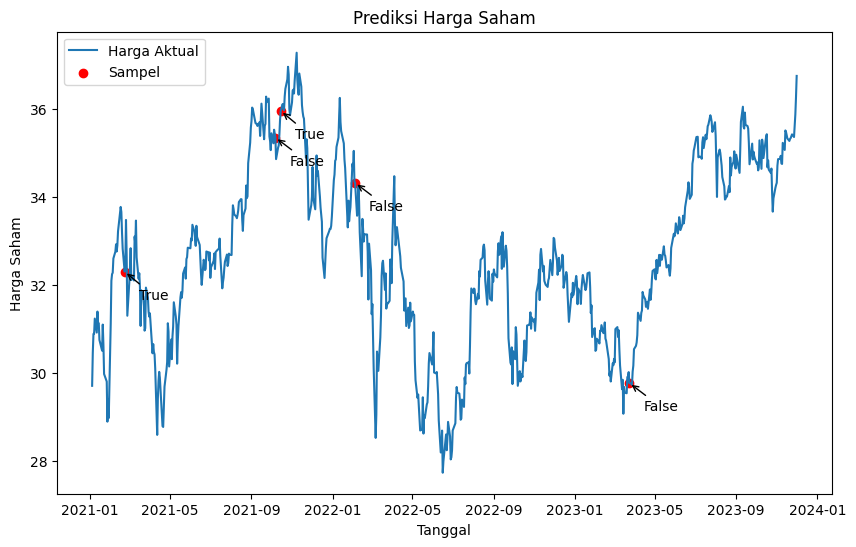

In [14]:
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Harga Aktual')
plt.scatter(sample_index, middle_sample['Close'], color='red', label='Sampel')

# Menambahkan label True/False pada titik sampel
for index, row in middle_sample.iterrows():
    plt.annotate(str(row['Label']), (index, row['Close']), xytext=(10, -20),
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()

In [15]:
# Mencetak skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

Akurasi model: 55.10%


In [16]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.51      0.46      0.48        67
        True       0.58      0.62      0.60        80

    accuracy                           0.55       147
   macro avg       0.54      0.54      0.54       147
weighted avg       0.55      0.55      0.55       147

